<a href="https://colab.research.google.com/github/Penk13/fastai/blob/main/SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Stochastic Gradient Descent (SGD)
Source: https://nbviewer.org/github/fastai/fastbook/blob/master/04_mnist_basics.ipynb

Steps:
1. Initialize the data
2. Initialize the parameters
3. Calculate the predictions
4. Calculate the loss
5. Calculate the gradients
6. Step the weights
7. Repeat the process

In [4]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastai.vision.all import *
from fastbook import *

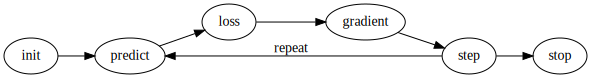

In [5]:
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

In [6]:
# Initialize the data
time = torch.arange(0,20).float();
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

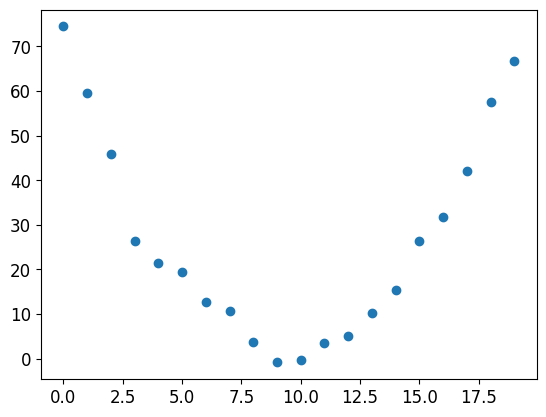

In [7]:
# Randomize
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);

In [8]:
# Initialize the parameters
params = torch.randn(3).requires_grad_()
params

tensor([-0.7658, -0.7506,  1.3525], requires_grad=True)

In [9]:
# Calculate the predictions
def f(t, params):
  a,b,c = params
  return a*t**2 + b*t + c

In [10]:
f(time, params)

tensor([ 1.3525e+00, -1.6391e-01, -3.2121e+00, -7.7919e+00, -1.3903e+01, -2.1547e+01, -3.0721e+01, -4.1428e+01, -5.3666e+01, -6.7436e+01, -8.2738e+01, -9.9571e+01, -1.1794e+02, -1.3783e+02,
        -1.5926e+02, -1.8222e+02, -2.0671e+02, -2.3274e+02, -2.6029e+02, -2.8938e+02], grad_fn=<AddBackward0>)

In [11]:
# Calculate the loss
def mse(preds, targets):
  return ((preds-targets)**2).mean()

In [12]:
loss = mse(f(time, params), speed)
loss

tensor(25823.8086, grad_fn=<MeanBackward0>)

In [13]:
def show_preds(preds, ax=None):
  if ax is None: ax=plt.subplots()[1]
  ax.scatter(time, speed)
  ax.scatter(time, to_np(preds), color='red')

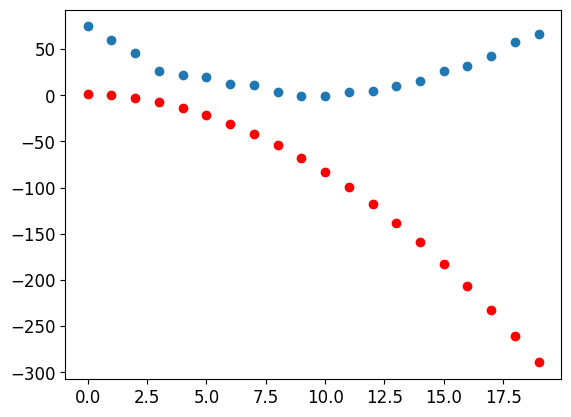

In [14]:
show_preds(f(time, params))

In [15]:
# Calculate the gradients
loss.backward()
params.grad

tensor([-53195.8633,  -3419.7148,   -253.8908])

In [16]:
# Step the weights
learning_rate = 1e-5
params.data -= params.grad * learning_rate
params.grad = None

In [17]:
# Repeat the process
def train(params):
  preds = f(time, params)
  loss = mse(preds, speed)
  loss.backward()
  params.data -= params.grad * learning_rate
  params.grad = None
  return preds, loss

In [18]:
# Stop
for i in range(10):
  print(f'Epoch: {i} Loss: {train(params)[1]}')

Epoch: 0 Loss: 5435.53564453125
Epoch: 1 Loss: 1577.44921875
Epoch: 2 Loss: 847.3778076171875
Epoch: 3 Loss: 709.2225341796875
Epoch: 4 Loss: 683.0758056640625
Epoch: 5 Loss: 678.1243896484375
Epoch: 6 Loss: 677.1838989257812
Epoch: 7 Loss: 677.0023803710938
Epoch: 8 Loss: 676.9645385742188
Epoch: 9 Loss: 676.9537353515625


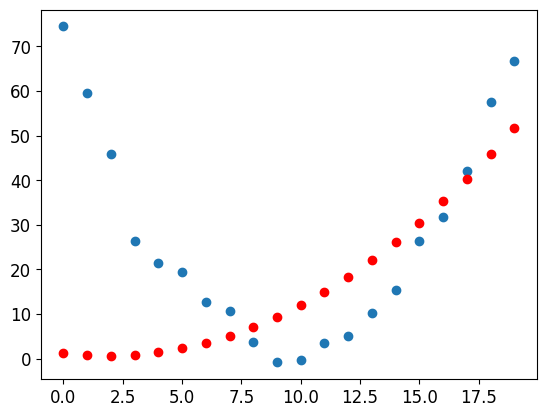

In [19]:
show_preds(f(time, params))